# Prophet Prediction

### Step 1: Importing libraries and modules

In [1]:
# 📌 Step 1: Imports
%load_ext autoreload
%autoreload 2
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

import sys
import os

# Add the project root directory to sys.path
sys.path.append(os.path.abspath('../'))
from backend.data.mock_data import generate_mock_stock_data



/home/softnut/Desktop/portfolio/stock-forecast-app/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Step 2: Loading mock data

In [2]:
# 📌 Step 2: Load mock data
df = generate_mock_stock_data()
print("Columns:", df.columns.tolist()) 
df = df[['Date', 'Close']].rename(columns={"Date": "ds", "Close": "y"})

Columns: ['Date', 'Close']


### Step 3: Train Prophet model

In [3]:

# 📌 Step 3: Train Prophet model
model = Prophet()
model.fit(df)

18:11:27 - cmdstanpy - INFO - Chain [1] start processing
18:11:27 - cmdstanpy - INFO - Chain [1] done processing


### Step 4: Forecast future prices

In [4]:
# 📌 Step 4: Forecast future prices
future = model.make_future_dataframe(periods=10)
forecast = model.predict(future)

### Step 5: Plot forecast

/home/softnut/Desktop/portfolio/stock-forecast-app/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


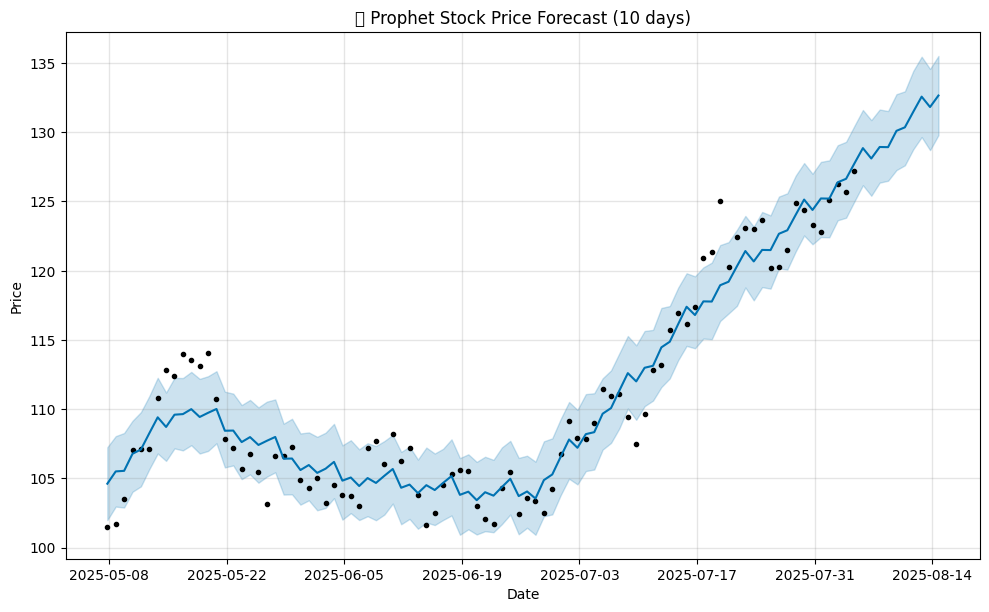

In [5]:
# 📌 Step 5: Plot forecast
model.plot(forecast)
plt.title("📈 Prophet Stock Price Forecast (10 days)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()